<img style="float: right;" width="120" src="http://neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<img style="float: left; margin-top: 0" width="80" src="http://neueda.conygre.com/pydata/images/client-logo.png">
<br><br><br>

### Load libraries and import data

In [11]:
# load pandas
import pandas as pd
# include %matplotlib inline

# Create a DataFrame called df_premiums from ../Data/Insurance Premiums.csv
df_premiums = pd.read_csv('http://neueda.conygre.com/pydata/Insurance_Premiums.csv', index_col='Date', parse_dates=True)

In [4]:
df_premiums.head()

USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
2000-01-04    282.05    281.50   172.166   171.929    275.305    272.402
2000-01-05    282.10    280.45   171.729   170.808    272.035    270.470
2000-01-06    280.35    279.40   170.446   169.518    270.974    269.152
2000-01-07    282.00    282.10   171.324   172.065    273.840    274.017
2000-01-10    281.70    281.60   172.230   171.959    275.205    274.812

### A quick plot of two columns, this uses matplotlib through pandas

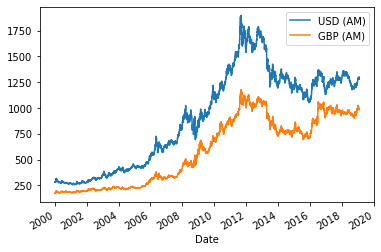

In [6]:
# line plot of 'USD (AM)' and 'GBP (AM)' columns
df_premiums[ ['USD (AM)', 'GBP (AM)'] ].plot()

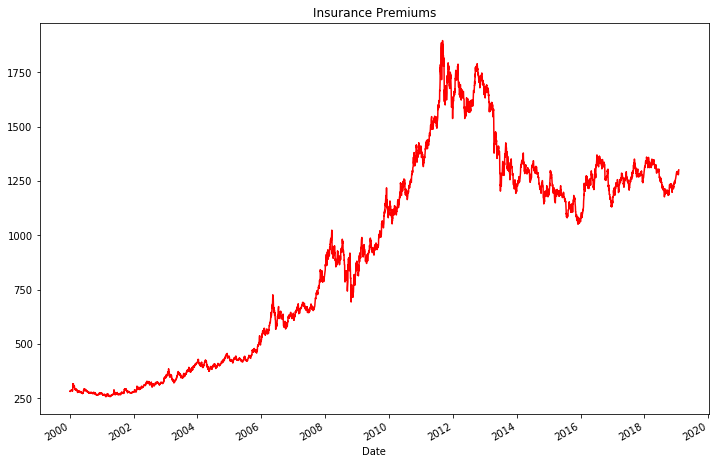

In [8]:
df_premiums['USD (AM)'].plot(kind = 'line', color = 'r', title = "Insurance Premiums", figsize = (12, 8))

### Be more specific, plot a single column in red, add a title

In [ ]:
# some extra parameters - USD (AM) line, color and title

### For more fine-grained control we can call matplotlib direcly

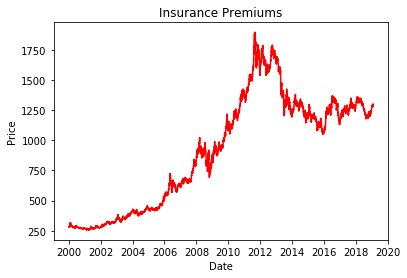

In [13]:
import matplotlib.pyplot as plt

# create same plot as above, but this time directly through matplotlib
x = df_premiums.index
y = df_premiums['USD (AM)']

plt.plot(x, y, 'r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Insurance Premiums')

plt.show()

### Change style and plot multiple axes on a single figure

See styles at <a href="https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html">matplotlib styles</a>

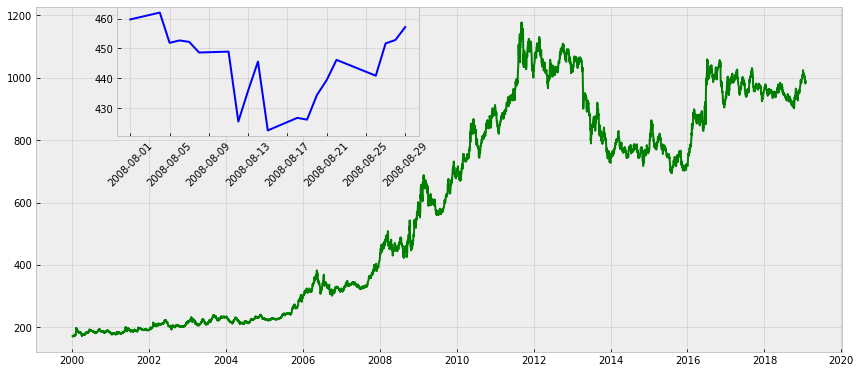

In [14]:
plt.style.use('bmh')

fig = plt.figure(figsize=(14, 6))

# left, bottom, width, height
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.18, 0.6, 0.3, 0.3])

x = df_premiums.index.date
y1 = df_premiums['GBP (AM)']

axes1.plot(x, y1, 'g')
axes2.plot(df_premiums['GBP (AM)']['Aug 2008'], 'b')

plt.xticks(rotation=45)

plt.show()

### Plot a histogram through pandas (uses matplotlib under the hood)

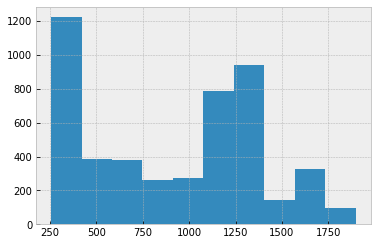

In [16]:
#Used more often
#df_premiums['USD (AM)'].plot(kind = 'hist')

df_premiums['USD (AM)'].hist()

### An area chart for 3 columns

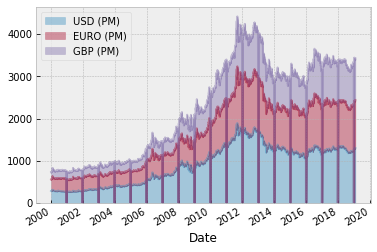

In [17]:
my_plot = df_premiums[ ['USD (PM)', 'EURO (PM)', 'GBP (PM)'] ].plot.area(alpha=0.4)

### We can save plots to file

In [18]:
my_plot.get_figure().savefig('example_plot.png')

### Stacked Bar Chart

In [20]:
df_premiums[ ['USD (PM)', 'EURO (PM)', 'GBP (PM)'] ].resample(rule='Y').mean()

USD (PM)    EURO (PM)     GBP (PM)
Date                                             
2000-12-31   279.102000   302.639580   184.301020
2001-12-31   271.035857   302.801725   188.234183
2002-12-31   309.677200   328.054804   206.126380
2003-12-31   363.320916   321.251418   222.194231
2004-12-31   409.166270   329.064000   223.311421
2005-12-31   444.447800   358.316780   244.845900
2006-12-31   603.772200   480.519684   327.636856
2007-12-31   695.386454   506.833853   347.012227
2008-12-31   871.962698   593.084317   471.485032
2009-12-31   972.348606   696.920378   621.432084
2010-12-31  1224.520916   925.110876   792.443721
2011-12-31  1571.520080  1129.698876   980.650426
2012-12-31  1668.980400  1298.665624  1053.007184
2013-12-31  1411.225697  1063.786223   903.453347
2014-12-31  1266.402390   952.879211   768.135044
2015-12-31  1160.062351  1045.225135   758.839625
2016-12-31  1250.798008  1129.306956   927.166056
2017-12-31  1257.145400  1114.315720   976.486400
2018-12-31  1268.486653  1073.557849   949.532908
2019-12-31  1288.257895  1128.555789  1002.126842

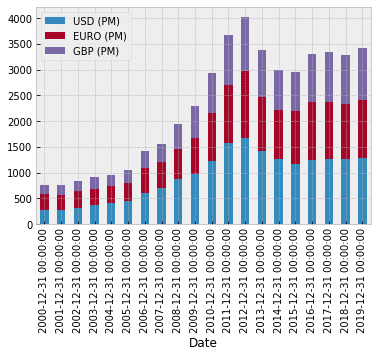

In [19]:
df_premiums[ ['USD (PM)', 'EURO (PM)', 'GBP (PM)'] ].resample(rule='Y').mean().plot.bar(stacked=True)

### Histograms

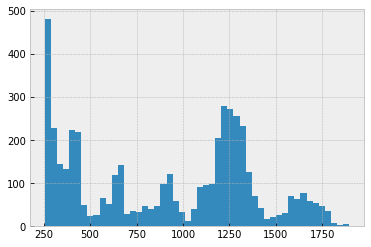

In [22]:
df_premiums['USD (PM)'].hist(bins = 50)

### Scatter Plots

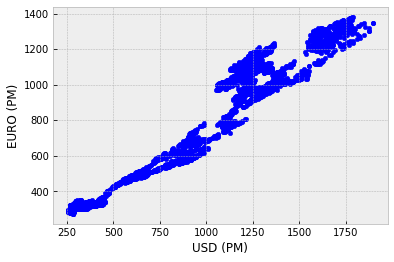

In [26]:
df_premiums.plot.scatter(x='USD (PM)', y='EURO (PM)')

You can use c to color based off another column value
Use cmap to indicate colormap to use. 
For all the colormaps, check out: http://matplotlib.org/users/colormaps.html

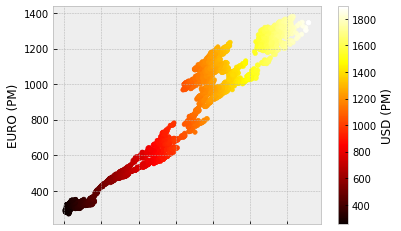

In [27]:
df_premiums.plot.scatter(x='USD (PM)', y='EURO (PM)', c='USD (PM)', cmap='hot')

### BoxPlots

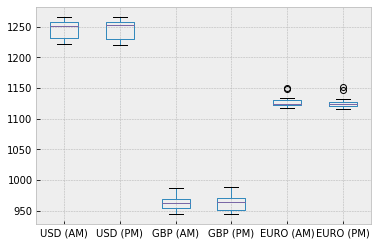

In [28]:
df_premiums['2017-MAY'].plot.box() # Can also pass a "by=..." argument for groupby

### Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

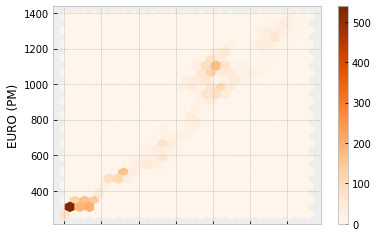

In [29]:
df_premiums.plot.hexbin(x='USD (PM)', y='EURO (PM)', gridsize=25, cmap='Oranges')

### Kernel Density Estimation plot (KDE)

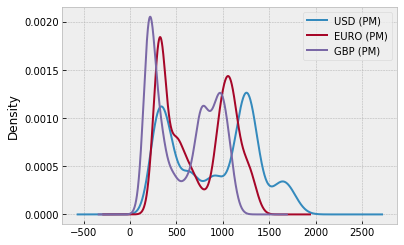

In [25]:
df_premiums[ ['USD (PM)', 'EURO (PM)', 'GBP (PM)'] ].plot.density()

### Styling the display of a DataFrame can also be a very useful visualisation tool

In [36]:
# highlight max and min in df_premiums.head()
df_premiums.head(10).style.highlight_max(color = 'red').highlight_min(color = 'lightblue')

In [32]:
# set a background gradient
df_premiums.head(10).style.background_gradient(cmap = 'Blues')

### There are a number of other plotting libraries in python, e.g. seaborn and plotly

This is an example using the seaborn plotting library

In [34]:
import seaborn as sns

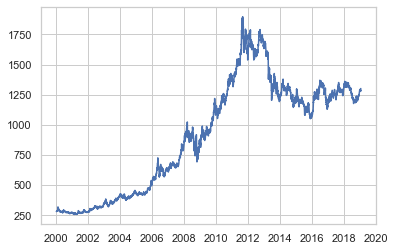

In [35]:
sns.set(style="whitegrid")
ax = sns.lineplot(data=df_premiums['USD (AM)'])